In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

from utils import *

In [2]:
plotpath="/project/cas/islas/python_plots/CESM2_ECS_TCR/FIGS/"

### Reading in the aprp data

In [3]:
cesm2_2deg_aprp = xr.open_dataset("/project/cas/islas/python_savs/CESM2issues/RAW_DATA/brian_aprp/CESM2_2deg_1pct_20YearWindow.nc")
paleo_aprp = xr.open_dataset("/project/cas/islas/python_savs/CESM2issues/RAW_DATA/brian_aprp/PaleoCalibr_2deg_1pct_20YearWindow.nc")
cesm2_1deg_aprp = xr.open_dataset("/project/cas/islas/python_savs/CESM2issues/RAW_DATA/brian_aprp/CESM2_1deg_1pct_20YearWindow.nc")

cesm2_2deg_aprp_4x = xr.open_dataset("/project/cas/islas/python_savs/CESM2issues/RAW_DATA/brian_aprp/CESM2_2deg_4xCO2_20YearWindow.nc")
paleo_aprp_4x = xr.open_dataset("/project/cas/islas/python_savs/CESM2issues/RAW_DATA/brian_aprp/PaleoCalibr_2deg_4xCO2_20YearWindow.nc")
cesm2_1deg_aprp_4x = xr.open_dataset("/project/cas/islas/python_savs/CESM2issues/RAW_DATA/brian_aprp/CESM2_1deg_4xCO2_20YearWindow.nc")

### Reading in model data

In [4]:
basepath="/project/cas/islas/python_savs/CESM2issues/DATA_SORT/globalmeans/SWCF/"
basepath_ts="/project/cas/islas/python_savs/CESM2issues/DATA_SORT/globalmeans/TS/"

#### CMIP6 models

In [10]:
cmip6models = pd.read_csv('/home/islas/python/CESM2issues/DATA_SORT/globalmeans/SWCF/cmip6csvinfo.csv')
models = cmip6models['Model']
cmip6_trans = []
for imodel in models:
    dat = xr.open_dataset(basepath+"CMIP6/SWCF_"+imodel+".nc").__xarray_dataarray_variable__
    datm = dat.mean('M')
    cmip6_trans.append(datm)
cmip6_trans = xr.concat(cmip6_trans, dim='models')

cmip6models = pd.read_csv('/home/islas/python/CESM2issues/DATA_SORT/globalmeans/SWCF/cmip6csvinfo_1pct.csv')
models = cmip6models['Model']
cmip6_pictrl = []
for imodel in models:
    dat = xr.open_dataset(basepath+"CMIP6_pictrl/SWCF_"+imodel+".nc").__xarray_dataarray_variable__
    cmip6_pictrl.append(dat)
cmip6_pictrl = xr.concat(cmip6_pictrl, dim='models')


cmip6models = pd.read_csv('/home/islas/python/CESM2issues/DATA_SORT/globalmeans/SWCF/cmip6csvinfo_1pct.csv')
models = cmip6models['Model']
cmip6_1pct = []
for imodel in models:
    dat = xr.open_dataset(basepath+"CMIP6_1pct/SWCF_"+imodel+".nc").__xarray_dataarray_variable__
    cmip6_1pct.append(dat)
cmip6_1pct = xr.concat(cmip6_1pct, dim='models')

cmip6models = pd.read_csv('/home/islas/python/CESM2issues/DATA_SORT/globalmeans/SWCF/cmip6csvinfo_1pct.csv')
models = cmip6models['Model']
cmip6_4x = []
for imodel in models:
    dat = xr.open_dataset(basepath+"CMIP6_4x/SWCF_"+imodel+".nc").__xarray_dataarray_variable__
    cmip6_4x.append(dat)
cmip6_4x = xr.concat(cmip6_4x, dim='models')

#### CESM2 1 degree

In [5]:
trans_1deg = xr.open_dataset(basepath+'SWCF_am_LENS2_first50.nc').SWCF
pct1_1deg = xr.open_dataset(basepath+'SWCF_1pct_1deg.nc').SWCF
abrupt4x_1deg = xr.open_dataset(basepath+'SWCF_abrupt4x_1deg.nc').SWCF
pictrl_1deg = xr.open_dataset(basepath+'SWCF_piControl_1deg.nc').SWCF

trans_1deg_ts = xr.open_dataset(basepath_ts+'TS_am_LENS2_first50.nc').TS
pct1_1deg_ts = xr.open_dataset(basepath_ts+'TS_1pct_1deg.nc').TS
abrupt4x_1deg_ts = xr.open_dataset(basepath_ts+'TS_abrupt4x_1deg.nc').TS
pictrl_1deg_ts = xr.open_dataset(basepath_ts+'TS_piControl_1deg.nc').TS

#### CESM2 2 degree

In [6]:
trans_2deg = xr.open_dataset(basepath+'SWCF_am_2deg.nc').SWCF
pct1_2deg = xr.open_dataset(basepath+'SWCF_1pct_2deg.nc').SWCF
abrupt4x_2deg = xr.open_dataset(basepath+'SWCF_abrupt4x_2deg.nc').SWCF
pictrl_2deg = xr.open_dataset(basepath+'SWCF_piControl_2deg.nc').SWCF

trans_2deg_ts = xr.open_dataset(basepath_ts+'TS_am_2deg.nc').TS
pct1_2deg_ts = xr.open_dataset(basepath_ts+'TS_1pct_2deg.nc').TS
abrupt4x_2deg_ts = xr.open_dataset(basepath_ts+'TS_abrupt4x_2deg.nc').TS
pictrl_2deg_ts = xr.open_dataset(basepath_ts+'TS_piControl_2deg.nc').TS

#### CESM2 paleocalibr

In [7]:
trans_paleo = xr.open_dataset(basepath+'SWCF_am_paleocalibr.nc').SWCF
pct1_paleo = xr.open_dataset(basepath+'SWCF_1pct_paleocalibr.nc').SWCF
abrupt4x_paleo = xr.open_dataset(basepath+'SWCF_abrupt4x_paleocalibr.nc').SWCF
pictrl_paleo = xr.open_dataset(basepath+'SWCF_picontrol_paleocalibr.nc').SWCF

trans_paleo_ts = xr.open_dataset(basepath_ts+'TS_am_paleocalibr.nc').TS
pct1_paleo_ts = xr.open_dataset(basepath_ts+'TS_1pct_paleocalibr.nc').TS
abrupt4x_paleo_ts = xr.open_dataset(basepath_ts+'TS_abrupt4x_paleocalibr.nc').TS
pictrl_paleo_ts = xr.open_dataset(basepath_ts+'TS_picontrol_paleocalibr.nc').TS

### Plotting the figure

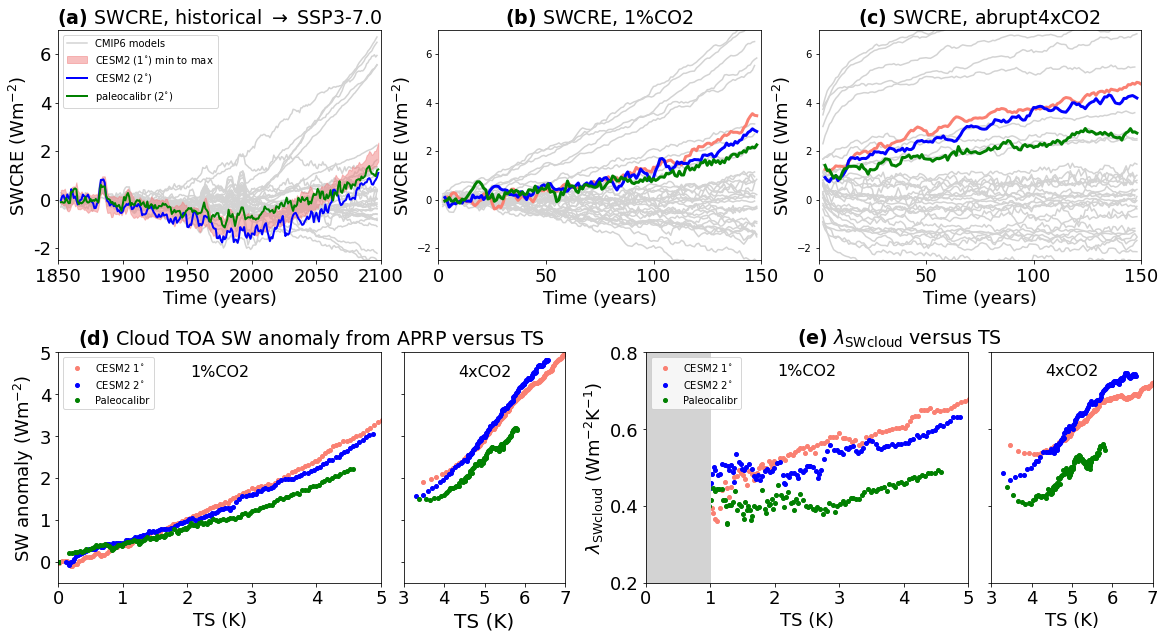

In [43]:
fig = plt.figure(figsize=(16,16))

#----------------panel (a)
ax = fig.add_axes([0.02,0.7,0.28,0.2])
ax.set_ylim(-2.5,7)
ax.set_yticks([-2,0,2,4,6])
ax.set_yticklabels(['-2','0','2','4','6'], fontsize=18)
ax.set_ylabel('SWCRE (Wm$^{-2}$)', fontsize=18)
ax.set_xticks([1850,1900,1950,2000,2050,2100])
ax.set_xticklabels(['1850','1900','1950','2000','2050','2100'], fontsize=18)
ax.set_title('$\\bf{(a)}$ SWCRE, historical $\\rightarrow$ SSP3-7.0', fontsize=19)
ax.set_xlim(1850,2100)
ax.set_xlabel('Time (years)', fontsize=18)

trans_1deg_anoms = trans_1deg - trans_1deg.sel(year=slice(1850,1900)).mean('year')
trans_2deg_anoms = trans_2deg - trans_2deg.sel(year=slice(1850,1900)).mean('year')
trans_paleo_anoms = trans_paleo - trans_paleo.sel(year=slice(1850,1900)).mean('year')
cmip6_trans_anoms = cmip6_trans - cmip6_trans.sel(year=slice(1850,1900)).mean('year')

trans_1deg_anoms = runningmean(trans_1deg_anoms, 5, timeaxis='year')
trans_2deg_anoms = runningmean(trans_2deg_anoms, 5, timeaxis='year')
trans_paleo_anoms = runningmean(trans_paleo_anoms, 5, timeaxis='year')
cmip6_trans_anoms = runningmean(cmip6_trans_anoms, 5, timeaxis='year')

for imodel in np.arange(0,cmip6_trans_anoms.models.size,1):
    ax.plot(cmip6_trans_anoms.year, cmip6_trans_anoms.isel(models=imodel), color='lightgray', zorder=0,
            label='CMIP6 models' if imodel == 0 else '')

ax.fill_between(trans_1deg_anoms.year, trans_1deg_anoms.min('M'), trans_1deg_anoms.max('M'), color='lightcoral', alpha=0.5, zorder=1,
                label='CESM2 (1$^{\circ}$) min to max')

ax.plot(trans_2deg_anoms.year, trans_2deg_anoms, color='blue', linewidth=2, zorder=2, label='CESM2 (2$^{\circ}$)')
ax.plot(trans_paleo_anoms.year, trans_paleo_anoms, color='green', linewidth=2, zorder=3, label='paleocalibr (2$^{\circ}$)')

ax.legend(loc='upper left')
#---------------------------------end panel (a)

#---------------------------------panel (b)
ax = fig.add_axes([0.35,0.7,0.28,0.2])
ax.set_ylim(-2.5,7)
ax.set_xlim(0,150)
ax.set_xticks([0,50,100,150])
ax.set_xticklabels(['0','50','100','150'], fontsize=18)
ax.set_ylabel('SWCRE (Wm$^{-2}$)', fontsize=18)
ax.set_title('$\\bf{(b)}$ SWCRE, 1%CO2', fontsize=19)
ax.set_xlabel('Time (years)', fontsize=18)

cmip6_1pct_anoms = cmip6_1pct - cmip6_pictrl.mean('year')
cmip6_1pct_anoms = runningmean(cmip6_1pct_anoms, 5, timeaxis='year')

pct1_1deg_anoms = pct1_1deg - pictrl_1deg.mean('year')
pct1_2deg_anoms = pct1_2deg - pictrl_2deg.mean('year')
pct1_paleo_anoms = pct1_paleo - pictrl_paleo.mean('year')

pct1_1deg_anoms = runningmean(pct1_1deg_anoms, 5, timeaxis='year')
pct1_2deg_anoms = runningmean(pct1_2deg_anoms, 5, timeaxis='year')
pct1_paleo_anoms = runningmean(pct1_paleo_anoms, 5, timeaxis='year')

for imodel in np.arange(0,cmip6_1pct_anoms.models.size,1):
    ax.plot(cmip6_1pct_anoms.year, cmip6_1pct_anoms.isel(models=imodel), color='lightgray', zorder=0,
            label='CMIP6 models' if imodel == 0 else '')

ax.plot(pct1_1deg_anoms.year, pct1_1deg_anoms, color='salmon', linewidth=3)
ax.plot(pct1_2deg_anoms.year, pct1_2deg_anoms, color='blue', linewidth=3)
ax.plot(pct1_paleo_anoms.year, pct1_paleo_anoms, color='green', linewidth=3)
#-----------------------------------end panel (b)

#-----------------------------------panel (c)
ax = fig.add_axes([0.68,0.7,0.28,0.2])
ax.set_ylim(-2.5,7)
ax.set_xlim(0,150)
ax.set_xticks([0,50,100,150])
ax.set_xticklabels(['0','50','100','150'], fontsize=18)
ax.set_ylabel('SWCRE (Wm$^{-2}$)', fontsize=18)
ax.set_title('$\\bf{(c)}$ SWCRE, abrupt4xCO2', fontsize=19)
ax.set_xlabel('Time (years)', fontsize=18)

cmip6_4x_anoms = cmip6_4x - cmip6_pictrl.mean('year')
cmip6_4x_anoms = runningmean(cmip6_4x_anoms, 5, timeaxis='year')

abrupt4x_1deg_anoms = abrupt4x_1deg - pictrl_1deg.mean('year')
abrupt4x_2deg_anoms = abrupt4x_2deg - pictrl_2deg.mean('year')
abrupt4x_paleo_anoms = abrupt4x_paleo - pictrl_paleo.mean('year')


abrupt4x_1deg_anoms = runningmean(abrupt4x_1deg_anoms, 5, timeaxis='year')
abrupt4x_2deg_anoms = runningmean(abrupt4x_2deg_anoms, 5, timeaxis='year')
abrupt4x_paleo_anoms = runningmean(abrupt4x_paleo_anoms, 5, timeaxis='year')


for imodel in np.arange(0,cmip6_4x_anoms.models.size,1):
    ax.plot(cmip6_4x_anoms.year, cmip6_4x_anoms.isel(models=imodel), color='lightgray', zorder=0,
            label='CMIP6 models' if imodel == 0 else '')

ax.plot(abrupt4x_1deg_anoms.year, abrupt4x_1deg_anoms, color='salmon', linewidth=3)
ax.plot(abrupt4x_2deg_anoms.year, abrupt4x_2deg_anoms, color='blue', linewidth=3)
ax.plot(abrupt4x_paleo_anoms.year, abrupt4x_paleo_anoms, color='green', linewidth=3)


#----------------------------------------panel (d)
#---1%CO2
ax = fig.add_axes([0.02,0.42,0.28,0.2])
ax.set_xlim(0,5)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(['0','1','2','3','4','5'], fontsize=18)
ax.set_title(' ')
ax.set_xlabel('TS (K)', fontsize=18)
ax.set_ylabel('SW anomaly (Wm$^{-2}$)', fontsize=18)
ax.set_ylim(-0.5,5)
ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(['0','1','2','3','4','5'], fontsize=18)
ax.plot(cesm2_1deg_aprp.delta_ts, cesm2_1deg_aprp.sw_anom_cld,"o", color='salmon', markersize=4, label='CESM2 1$^{\circ}$')
ax.plot(cesm2_2deg_aprp.delta_ts, cesm2_2deg_aprp.sw_anom_cld,"o", color='blue', markersize=4, label='CESM2 2$^{\circ}$')
ax.plot(paleo_aprp.delta_ts, paleo_aprp.sw_anom_cld,"o", color='green', markersize=4, label='Paleocalibr')

ax.text(2.5,4.7,'1%CO2', fontsize=16, ha='center',va='top')
ax.legend(loc='upper left')

#---4xCO2
ax = fig.add_axes([0.32,0.42,0.14,0.2])
ax.set_ylim(-0.5,5)
ax.set_xlim(3,7)
ax.set_xlabel('TS (K)', fontsize=20)
ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(['','','','','',''], fontsize=18)
ax.set_xticks([3,4,5,6,7])
ax.set_xticklabels(['3','4','5','6','7'], fontsize=18)
ax.plot(cesm2_1deg_aprp_4x.delta_ts, cesm2_1deg_aprp_4x.sw_anom_cld,"o", color='salmon', markersize=4, label='CESM2 1$^{\circ}$')
ax.plot(cesm2_2deg_aprp_4x.delta_ts, cesm2_2deg_aprp_4x.sw_anom_cld,"o", color='blue', markersize=4, label='CESM2 2$^{\circ}$')
ax.plot(paleo_aprp_4x.delta_ts, paleo_aprp_4x.sw_anom_cld,"o", color='green', markersize=4, label='Paleocalibr')

ax.text(5,4.7,'4xCO2', fontsize=16, ha='center',va='top')

fig.text(0.24,0.627,'$\\bf{(d)}$ Cloud TOA SW anomaly from APRP versus TS', fontsize=19, ha='center')


#---------------------------------panel (e)
ax = fig.add_axes([0.53,0.42,0.28,0.2]) 
ax.set_ylim(0.2,0.8)
ax.set_yticks([0.2,0.4,0.6,0.8])
ax.set_yticklabels(['0.2','0.4','0.6','0.8'], fontsize=18)
ax.set_xlim(0,5)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(['0','1','2','3','4','5'], fontsize=18)
ax.set_xlabel('TS (K)', fontsize=18)
ax.set_ylabel('$\lambda_{\mathrm{SW cloud}}$ (Wm$^{-2}$K$^{-1}$)', fontsize=18)

ax.plot(cesm2_1deg_aprp.delta_ts, cesm2_1deg_aprp.sw_fdbk_cld,"o", color='salmon', markersize=4, label='CESM2 1$^{\circ}$')
ax.plot(cesm2_2deg_aprp.delta_ts, cesm2_2deg_aprp.sw_fdbk_cld,"o", color='blue', markersize=4, label='CESM2 2$^{\circ}$')
ax.plot(paleo_aprp.delta_ts, paleo_aprp.sw_fdbk_cld,"o", color='green', markersize=4, label='Paleocalibr')

ax.fill_between([0,1],[0.2,0.2],[0.8,0.8], color='lightgray', zorder=2)

ax.legend(loc='upper left')

ax.text(2.5,0.77,'1%CO2', fontsize=16, ha='center',va='top')


ax = fig.add_axes([0.83,0.42,0.14,0.2])
ax.set_ylim(0.2,0.8)
ax.set_xlim(3,7)
ax.set_xlabel('TS (K)', fontsize=18)
ax.set_yticks([0.2,0.4,0.6,0.8])
ax.set_yticklabels([' ',' ',' ',' '], fontsize=18)
ax.set_xticks([3,4,5,6,7])
ax.set_xticklabels(['3','4','5','6','7'], fontsize=18)

ax.plot(cesm2_1deg_aprp_4x.delta_ts, cesm2_1deg_aprp_4x.sw_fdbk_cld,"o", color='salmon', markersize=4)
ax.plot(cesm2_2deg_aprp_4x.delta_ts, cesm2_2deg_aprp_4x.sw_fdbk_cld,"o", color='blue', markersize=4)
ax.plot(paleo_aprp_4x.delta_ts, paleo_aprp_4x.sw_fdbk_cld,"o", color='green', markersize=4)

ax.text(5,0.77,'4xCO2', fontsize=16, ha='center',va='top')
#sys.exit()
fig.text(0.75,0.627,'$\\bf{(e)}$ $\lambda_{\mathrm{SW cloud}}$ versus TS', fontsize=19, ha='center')

fig.savefig(plotpath+'fig3.png', bbox_inches='tight', facecolor='white')
fig.savefig(plotpath+'fig3.pdf', bbox_inches='tight', facecolor='white')